In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df = pd.DataFrame({
    'name': ['alice','bob','charlie','daniel'],
    'age': [2,15,30,70]
})
df    

,name,age
0,alice,2
1,bob,15
2,charlie,30
3,daniel,70


In [3]:
df.assign(
    age_cat = lambda x : x.age.map(lambda x : 'Young' if x < 30 else 'Old')
)

,name,age,age_cat
0,alice,2,Young
1,bob,15,Young
2,charlie,30,Old
3,daniel,70,Old


In [4]:
df = pd.DataFrame({
    'make': ['audi','audi','mercedes','toyota', 'honda'],
    'price': [200,200,3000,70000,5000]
})
df    

,make,price
0,audi,200
1,audi,200
2,mercedes,3000
3,toyota,70000
4,honda,5000


In [5]:
german_list = ['audi', 'mercedes', 'bmw', ]
japan_list = ['toyota', 'honda', 'mazda']

conditions = [ 
    (df.make.isin(german_list)),
    (df.make.isin(japan_list)),
]

values = ['German', 'Japan']

df['make_country'] = np.select(conditions, values)
df

,make,price,make_country
0,audi,200,German
1,audi,200,German
2,mercedes,3000,German
3,toyota,70000,Japan
4,honda,5000,Japan


In [6]:
German = ['audi', 'mercedes', 'bmw']
df.loc[df.make.isin(German),  'country'] = 'German'

In [7]:
df.loc[[0,3], 'price'] = 299
df

,make,price,make_country,country
0,audi,299,German,German
1,audi,200,German,German
2,mercedes,3000,German,German
3,toyota,299,Japan,NaN
4,honda,5000,Japan,NaN


In [8]:
df.loc[0, 'price']

299

In [9]:
df

,make,price,make_country,country
0,audi,299,German,German
1,audi,200,German,German
2,mercedes,3000,German,German
3,toyota,299,Japan,NaN
4,honda,5000,Japan,NaN


In [10]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [11]:
df.duplicated(keep= 'last')

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [12]:
df.duplicated(keep= 'first')

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [13]:
df.duplicated(keep= False)

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [14]:
df.duplicated(subset=['make', 'country'], keep= False)

0     True
1     True
2    False
3    False
4    False
dtype: bool

In [15]:
df

,make,price,make_country,country
0,audi,299,German,German
1,audi,200,German,German
2,mercedes,3000,German,German
3,toyota,299,Japan,NaN
4,honda,5000,Japan,NaN


In [16]:
print(df.shape)
df.drop_duplicates().shape

(5, 4)


(5, 4)

In [19]:
df = pd.read_csv('auto_02.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(2)

,location,make,model,make_model,age,short_description,year,price,mileage_km,registration,...,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp,make_country
0,LOON OP ZAND,Audi,A3,Audi-A3,19.0,2.0 FSI Ambition Pro Line,2003.0,4450.0,191066.0,2003-08-01,...,"'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,Black,Cloth,110.0,150.0,German
1,HEERLEN,Audi,A3,Audi-A3,9.0,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,2013.0,12950.0,94758.0,2013-10-01,...,"'Alarm system', 'Central door lock', 'Central ...","'Alloy wheels (16"")'",White,None,None,Black,Cloth,92.0,125.0,German


In [20]:
columns_object = df.select_dtypes(include='object').columns
columns_object

Index(['location', 'make', 'model', 'make_model', 'short_description',
       'registration', 'fuel_type', 'seller', 'body_type', 'type',
       'drivetrain', 'country_version', 'offer_number', 'first_registration',
       'production_date', 'general_inspection', 'last_service',
       'full_service_history', 'non_smoker_vehicle', 'previous_owner',
       'last_timing_belt_change', 'Gearbox', 'gears', 'Fuel_type',
       'fuel_consumption', 'emission_class', 'emissions_sticker',
       'Comfort & Convenience', 'Entertainment & Media', 'Safety & Security',
       'extras', 'colour', 'manufacturer_color', 'paint', 'upholstery_colour',
       'upholstery', 'make_country'],
      dtype='object')

In [21]:
df[columns_object] = df[columns_object].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67376 entries, 0 to 67375
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   location                 67372 non-null  category
 1   make                     67376 non-null  category
 2   model                    67376 non-null  category
 3   make_model               67376 non-null  category
 4   age                      67376 non-null  float64 
 5   short_description        67218 non-null  category
 6   year                     67376 non-null  float64 
 7   price                    67376 non-null  float64 
 8   mileage_km               67376 non-null  float64 
 9   registration             67376 non-null  category
 10  fuel_type                67376 non-null  category
 11  seller                   67376 non-null  category
 12  body_type                67376 non-null  category
 13  type                     67376 non-null  category
 14  drivet

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67376 entries, 0 to 67375
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 67372 non-null  object 
 1   make                     67376 non-null  object 
 2   model                    67376 non-null  object 
 3   make_model               67376 non-null  object 
 4   age                      67376 non-null  float64
 5   short_description        67218 non-null  object 
 6   year                     67376 non-null  float64
 7   price                    67376 non-null  float64
 8   mileage_km               67376 non-null  float64
 9   registration             67376 non-null  object 
 10  fuel_type                67376 non-null  object 
 11  seller                   67376 non-null  object 
 12  body_type                67376 non-null  object 
 13  type                     67376 non-null  object 
 14  drivetrain            

In [19]:
df.duplicated(keep= False).sum()

3995

In [20]:
df.duplicated(subset=['make_model', 'year', 'mileage_km','price', 'short_description' ]).sum()

3123

In [21]:
df.loc[df.duplicated(keep=False), :].head(6)

,location,make,model,make_model,age,short_description,year,price,mileage_km,registration,...,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp,make_country
415,ROTTERDAM,Audi,A3,Audi-A3,12.0,1.4 TFSI S-edition,2010.0,6749.0,220000.0,2010-03-01,...,"'Central door lock with remote control', 'Dayt...","'Alloy wheels', 'Roof rack', 'Spoiler', 'Sport...",Black,None,None,Black,Partleather,92.0,125.0,German
604,ZUILICHEM,Audi,A1,Audi-A1,10.0,1.2 TFSI Connect 2012 Airco Navigatie Cruise C...,2012.0,5950.0,291473.0,2012-01-01,...,"'ABS', 'Central door lock', 'Central door lock...","'Alloy wheels (16"")'",Black,None,None,None,None,63.0,86.0,German
607,GORINCHEM,Audi,A1,Audi-A1,12.0,1.2 TFSI Attraction Airco,2010.0,5950.0,221136.0,2010-12-01,...,"'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',White,None,None,None,Cloth,63.0,86.0,German
625,OOSTDIJK,Audi,A3,Audi-A3,13.0,1.4 TFSI Attraction,2009.0,5700.0,200250.0,2009-04-01,...,"'ABS', 'Central door lock with remote control'...","'Alloy wheels (16"")', 'Spare tyre', 'Trailer h...",Blue,None,Metallic,Blue,Cloth,92.0,125.0,German
635,WOMMELS,Audi,A3,Audi-A3,16.0,1.6 FSI Ambiente,2006.0,2750.0,289500.0,2006-11-01,...,"'Central door lock', 'Central door lock with r...","'Alloy wheels (16"")', 'Automatically dimming i...",Blue,None,None,None,None,85.0,116.0,German
638,WOMMELS,Audi,A3,Audi-A3,16.0,1.6 FSI Ambiente,2006.0,2750.0,289500.0,2006-11-01,...,"'Central door lock', 'Central door lock with r...","'Alloy wheels (16"")', 'Automatically dimming i...",Blue,None,None,None,None,85.0,116.0,German


In [22]:
df.duplicated().sum()

2012

In [23]:
df.duplicated(keep ='last').sum()

2012

In [45]:
df = pd.DataFrame({
    'make': ['audi','audi','audi','mercedes',np.NaN, 'honda'],
    'price': [np.NaN,200,200,3000,70000,np.NaN]
})
df    

,make,price
0,audi,NaN
1,audi,200.0
2,audi,200.0
3,mercedes,3000.0
4,NaN,70000.0
5,honda,NaN


In [46]:
df.loc[df.duplicated() , :]

,make,price
2,audi,200.0


In [51]:
df.isnull().sum()

make     1
price    2
dtype: int64

In [59]:
df.dropna(subset=['price'], inplace=False)

,make,price
1,audi,200.0
2,audi,200.0
3,mercedes,3000.0
4,NaN,70000.0


In [8]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman', np.NAN],

                   "toy": [np.nan, 'Batmobile', 'Bullwhip', 'Lego'],

                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),

                            pd.NaT, pd.Timestamp("2020-04-25")]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT
3,NaN,Lego,2020-04-25


In [12]:
df.dropna(subset=['name', 'toy'], how='any')

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [16]:
df = pd.read_csv('df_mer_bmw.csv')
df.drop('Unnamed: 0', axis=1, inplace= True)
df.head(1)


,location,make,model,make_model,age,short_description,year,price,mileage_km,registration,...,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp,make_country
0,APLHEN AAN DEN RIJN,BMW,316,BMW-316,21.0,Compact 316ti Executive,2001.0,1450.0,231339.0,2001-09-01,...,"'ABS', 'Alarm system', 'Central door lock', 'C...",'Sport suspension',Blue,None,Metallic,None,Cloth,85.0,116.0,German


In [90]:
small_30_tf = (df.make_model.value_counts() < 30)
(small_30_tf).index.values

(294,)

In [71]:
(df.make_model.value_counts(ascending= True) < 30)

MercedesBenz-S300      True
BMW-M850               True
BMW-620                True
BMW-425                True
MercedesBenz-ML450     True
                      ...  
BMW-330               False
BMW-218               False
MercedesBenz-C180     False
BMW-X5                False
BMW-320               False
Name: make_model, Length: 294, dtype: bool

In [72]:
(df.make_model.value_counts(ascending= True) < 30).index

Index(['MercedesBenz-S300', 'BMW-M850', 'BMW-620', 'BMW-425',
       'MercedesBenz-ML450', 'MercedesBenz-S550', 'BMW-ActiveHybridX6',
       'MercedesBenz-CLA35AMG', 'BMW-123', 'MercedesBenz-E430',
       ...
       'MercedesBenz-B180', 'BMW-318', 'BMW-118', 'BMW-X1',
       'MercedesBenz-A180', 'BMW-330', 'BMW-218', 'MercedesBenz-C180',
       'BMW-X5', 'BMW-320'],
      dtype='object', length=294)

In [185]:
[i for i in small_30_tf.index if small_30_tf[i]][:10]

['BMW-645',
 'BMW-430',
 'BMW-X4',
 'MercedesBenz-A220',
 'BMW-135',
 'MercedesBenz-S320',
 'MercedesBenz-C63AMG',
 'MercedesBenz-S500',
 'BMW-440',
 'MercedesBenz-E280']

In [96]:
small_30_tf[small_30_tf].index.shape

(203,)

In [84]:
s = pd.Series([True, False, True, True, False, False, False, True])
s

0     True
1    False
2     True
3     True
4    False
5    False
6    False
7     True
dtype: bool

In [85]:
s.index

RangeIndex(start=0, stop=8, step=1)

In [86]:
s.index.values

array([0, 1, 2, 3, 4, 5, 6, 7])

In [87]:
s[s].index

Int64Index([0, 2, 3, 7], dtype='int64')

In [89]:
s[s].index.values

2

In [152]:
aranan = small_30_tf[small_30_tf].index
aranan

Index(['BMW-645', 'BMW-430', 'BMW-X4', 'MercedesBenz-A220', 'BMW-135',
       'MercedesBenz-S320', 'MercedesBenz-C63AMG', 'MercedesBenz-S500',
       'BMW-440', 'MercedesBenz-E280',
       ...
       'BMW-X3M', 'MercedesBenz-GLK300', 'MercedesBenz-GL63AMG',
       'MercedesBenz-GLA35AMG', 'MercedesBenz-E430', 'MercedesBenz-CLS63AMG',
       'MercedesBenz-S550', 'MercedesBenz-CLA35AMG', 'MercedesBenz-416',
       'MercedesBenz-S300'],
      dtype='object', length=203)

In [168]:
list_aranan = list(aranan)
len(list_aranan)


203

In [101]:
df.head(1)

,location,make,model,make_model,age,short_description,year,price,mileage_km,registration,...,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp,make_country
0,APLHEN AAN DEN RIJN,BMW,316,BMW-316,21.0,Compact 316ti Executive,2001.0,1450.0,231339.0,2001-09-01,...,"'ABS', 'Alarm system', 'Central door lock', 'C...",'Sport suspension',Blue,None,Metallic,None,Cloth,85.0,116.0,German


In [133]:
df.loc[(df.price > 300000), ['make_model' , 'price'] ]

,make_model,price
10415,MercedesBenz-AMGGT,1250000.0
11276,MercedesBenz-G400,999999.0


In [141]:
(df.price > 300000)[(df.price > 300000)]

Int64Index([10415, 11276], dtype='int64')

In [169]:

criteria = df['make_model'].map(lambda x :  x in list_aranan)

In [175]:
df[criteria].groupby('make_model')['model'].count()

make_model
BMW-114               17
BMW-123                1
BMW-125               23
BMW-130                6
BMW-135               27
                      ..
MercedesBenz-V250     18
MercedesBenz-V300      9
MercedesBenz-Viano    16
MercedesBenz-X250     10
MercedesBenz-X350      4
Name: model, Length: 203, dtype: int64

In [177]:
df[criteria].index

Int64Index([    5,     6,    16,   115,   147,   185,   191,   193,   202,
              204,
            ...
            13718, 13720, 13770, 13775, 13788, 13797, 13923, 13936, 13945,
            13952],
           dtype='int64', length=1561)

In [178]:
df.index

RangeIndex(start=0, stop=13956, step=1)

In [179]:
small_30_tf = (df.make_model.value_counts() < 30)

aranan = small_30_tf[small_30_tf].index

list_aranan = list(aranan)

criteria = df['make_model'].map(lambda x :  x in list_aranan)

df[criteria].index

Int64Index([    5,     6,    16,   115,   147,   185,   191,   193,   202,
              204,
            ...
            13718, 13720, 13770, 13775, 13788, 13797, 13923, 13936, 13945,
            13952],
           dtype='int64', length=1561)

In [180]:
df.shape

(13956, 50)

In [181]:
df.drop(index= df[criteria].index ).shape

(12395, 50)

In [182]:
small_30_tf

BMW-320                  False
BMW-X5                   False
MercedesBenz-C180        False
BMW-218                  False
BMW-330                  False
                         ...  
MercedesBenz-CLS63AMG     True
MercedesBenz-S550         True
MercedesBenz-CLA35AMG     True
MercedesBenz-416          True
MercedesBenz-S300         True
Name: make_model, Length: 294, dtype: bool

In [184]:
(df.make_model.value_counts() < 30)

BMW-320                  False
BMW-X5                   False
MercedesBenz-C180        False
BMW-218                  False
BMW-330                  False
                         ...  
MercedesBenz-CLS63AMG     True
MercedesBenz-S550         True
MercedesBenz-CLA35AMG     True
MercedesBenz-416          True
MercedesBenz-S300         True
Name: make_model, Length: 294, dtype: bool

In [186]:
df = pd.DataFrame({
    'make': ['audi','audi','audi','mercedes',np.NaN, 'honda'],
    'price': [np.NaN,200,200,3000,70000,np.NaN]
})
df    

,make,price
0,audi,NaN
1,audi,200.0
2,audi,200.0
3,mercedes,3000.0
4,NaN,70000.0
5,honda,NaN


In [188]:
make_to_country = {'audi' : 'german',
                   'mercedes' : 'german',
                   'honda' : 'japan'
}
df['country'] = df.make.map(make_to_country)
df

,make,price,country
0,audi,NaN,german
1,audi,200.0,german
2,audi,200.0,german
3,mercedes,3000.0,german
4,NaN,70000.0,NaN
5,honda,NaN,japan


In [189]:
df = pd.DataFrame({
    'make': ['audi','audi','audi','mercedes',np.NaN, 'honda'],
    'price': [np.NaN,200,200,3000,70000,np.NaN]
})
df    

,make,price
0,audi,NaN
1,audi,200.0
2,audi,200.0
3,mercedes,3000.0
4,NaN,70000.0
5,honda,NaN


In [190]:
make_to_country = {['audi' , 'mercedes'] : 'german',
                   'honda' : 'japan'
}
df['country'] = df.make.map(make_to_country)
df

TypeError: unhashable type: 'list'

In [192]:
df = pd.DataFrame(np.array([[1, 1], [2, 10], [3, 100], [4, 100]]),

                  columns=['a', 'b'])

df

,a,b
0,1,1
1,2,10
2,3,100
3,4,100


In [195]:
df.quantile(0.99)

a      3.97
b    100.00
Name: 0.99, dtype: float64

In [197]:
s = pd.Series(list('abca'))
s

0    a
1    b
2    c
3    a
dtype: object

In [198]:
df.head()

,a,b
0,1,1
1,2,10
2,3,100
3,4,100


In [200]:
df.b.loc[df.b >50]

2    100
3    100
Name: b, dtype: int64

In [201]:
df.b.loc[df.b >50] = 9999
df.b.loc[df.b >50]

2    9999
3    9999
Name: b, dtype: int64

In [202]:
df

,a,b
0,1,1
1,2,10
2,3,9999
3,4,9999


In [2]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [13]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
np.array([ 22116.15639432,  20575.34491639,  14825.92010352,  18720.31927493,
        20046.44711295,  23837.85638874,  16337.23308209,   5473.44882059])

array([22116.15639432, 20575.34491639, 14825.92010352, 18720.31927493,
       20046.44711295, 23837.85638874, 16337.23308209,  5473.44882059])

In [18]:
df08 = df.head(8)
df08

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [21]:
df_pre = pd.DataFrame({'Predict' : np.array([ 22116.15639432,  20575.34491639,  14825.92010352,  18720.31927493,
        20046.44711295,  23837.85638874,  16337.23308209,   5473.44882059])})

df_pre

,Predict
0,22116.156394
1,20575.344916
2,14825.920104
3,18720.319275
4,20046.447113
5,23837.856389
6,16337.233082
7,5473.448821


In [23]:
df_new = pd.concat([df08, df_pre], axis=1 , ignore_index=False)
df_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Predict
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22116.156394
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,20575.344916
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,14825.920104
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,18720.319275
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,20046.447113
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,23837.856389
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,16337.233082
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5473.448821


In [103]:
pd.set_option('display.max_rows', None)

# LOAD DATASET

In [98]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df = pd.read_csv('df_full.csv', index_col=[0])
df = df[['make', 'model', 'year', 'mileage_km','price', 'Gearbox', 'fuel_type', 'colour', 'seller']]
print(df.head(2))

df.Gearbox = df.Gearbox.replace('None', np.NaN)

dms = pd.get_dummies(df[['make', 'model', 'Gearbox','fuel_type', 'colour','seller']], prefix='model')

X_ = df.drop(['price','make', 'model', 'Gearbox','fuel_type', 'colour','seller'], axis='columns').astype('float64')
y = df.price
X = pd.concat([X_, dms[list(dms.columns)]], axis=1)

pd.set_option('display.float_format', lambda x: '%.0f' % x)
X.head(2)

  make model  year  mileage_km  price    Gearbox fuel_type colour  seller
0  BMW   316  2001      231339   1450  Automatic  Gasoline   Blue  Dealer
1  BMW   320  2016      105267  22490  Automatic  Gasoline  Black  Dealer


,year,mileage_km,model_BMW,model_MercedesBenz,model_116,model_118,model_120,model_216,model_218,model_220,...,model_Grey,model_None,model_Orange,model_Red,model_Silver,model_Violet,model_White,model_Yellow,model_Dealer,model_Privateseller
0,2001,231339,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2016,105267,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [105]:
df.groupby('make')['model'].value_counts()[:5]

make  model
BMW   320      616
      X5       490
      218      449
      330      431
      X1       412
Name: model, dtype: int64

In [113]:
df.groupby('model')['price'].value_counts()

model     price 
116       5950       8
          6950       6
          4750       5
          4950       5
          4999       5
          6750       5
          7999       5
          9950       5
          16900      5
          17900      5
          4450       4
          4995       4
          5450       4
          5750       4
          6200       4
          6995       4
          7950       4
          8000       4
          10500      4
          10900      4
          16950      4
          3750       3
          3995       3
          4250       3
          4500       3
          5250       3
          5499       3
          5500       3
          5999       3
          6500       3
          7000       3
          7450       3
          9500       3
          12950      3
          13900      3
          14950      3
          15900      3
          3950       2
          5000       2
          5495       2
          5700       2
          5990       2
          6450   

In [112]:
df.isna().sum()

make           0
model          0
year           0
mileage_km     0
price          0
Gearbox       15
fuel_type      0
colour         0
seller         0
dtype: int64

# ML MODEL

In [14]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

gbm_model =  GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

y_pred = gbm_model.predict(X_test)
print('GBM_Model hata : ', np.sqrt(mean_squared_error(y_test, y_pred)))

gbm_params = {
            'learning_rate' :[0.01, 0.1],
            'max_depth': [50,100],
            'n_estimators': [100],
            'subsample': [1, 0.5],}

#gbm = GradientBoostingRegressor()
#gbm_cv_model =  GridSearchCV(gbm, gbm_params, cv=5, n_jobs=-1, verbose=2)
#gbm_cv_model.fit(X_train, y_train)

#gbm_cv_model.best_params_

gbm_tuned = GradientBoostingRegressor()

gbm_tuned = GradientBoostingRegressor ( learning_rate= 0.1,
                                       max_depth= 100,
                                       n_estimators= 100,
                                       subsample= 0.5)

gbm_tuned = gbm_tuned.fit(X_train, y_train)

y_pred =  gbm_tuned.predict(X_test)
%time print('GBM_Tuned Hata :', np.sqrt(mean_squared_error(y_test, y_pred)))

GBM_Model hata :  6243.31649227032
GBM_Tuned Hata : 5035.3038258909555
CPU times: user 494 µs, sys: 78 µs, total: 572 µs
Wall time: 587 µs


In [42]:
from sklearn.impute import SimpleImputer
df.head()

,make,model,year,mileage_km,price,Gearbox,fuel_type,colour,seller
0,BMW,316,2001,231339,1450,Automatic,Gasoline,Blue,Dealer
1,BMW,320,2016,105267,22490,Automatic,Gasoline,Black,Dealer
2,BMW,116,2014,70491,15999,Automatic,Gasoline,Grey,Dealer
3,BMW,120,2004,342421,2790,Automatic,Gasoline,Blue,Dealer
4,BMW,435,2015,63507,35300,Automatic,Gasoline,Black,Dealer


In [94]:
imp = SimpleImputer(strategy='most_frequent')
df.iloc[:, :] = imp.fit_transform(df)
df.Gearbox.value_counts()

In [97]:
imp = SimpleImputer(missing_values='None', strategy='most_frequent')
df.iloc[:, :] = imp.fit_transform(df)
df.colour.value_counts()

Grey      4291
Black     3953
White     1511
Blue      1362
Silver     358
Brown      267
Red        178
Green       83
Beige       51
Orange      27
Yellow      26
Gold        12
Violet      12
Bronze       2
Name: colour, dtype: int64

Automatic        8975
Manual           3050
Semiautomatic     108
Name: Gearbox, dtype: int64

In [83]:
df.colour.value_counts()

Grey      4177
Black     3953
White     1511
Blue      1362
Silver     358
Brown      267
Red        178
None       114
Green       83
Beige       51
Orange      27
Yellow      26
Gold        12
Violet      12
Bronze       2
Name: colour, dtype: int64

In [90]:
imp = SimpleImputer( missing_values='None', strategy='constant', fill_value='AAA')
df.iloc[:, :] = imp.fit_transform(df)
df.colour.value_counts()

ValueError: Input contains NaN

In [70]:
mpl.style.use(['ggplot'])

In [2]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df = pd.read_csv('df_full.csv', index_col=[0])
df = df[['make', 'model', 'year', 'mileage_km','price', 'Gearbox', 'fuel_type', 'colour', 'seller']]
print(df.head(2))

  make model  year  mileage_km  price    Gearbox fuel_type colour  seller
0  BMW   316  2001      231339   1450  Automatic  Gasoline   Blue  Dealer
1  BMW   320  2016      105267  22490  Automatic  Gasoline  Black  Dealer


In [19]:
df_new = df.groupby('make')['model'].value_counts().to_frame()
df_new

model
make         model          
BMW          320         616
             X5          490
             218         449
             330         431
             X1          412
...                      ...
MercedesBenz CLS350       34
             A170         33
             ML320        33
             S350         31
             GLA45AMG     30

[89 rows x 1 columns]

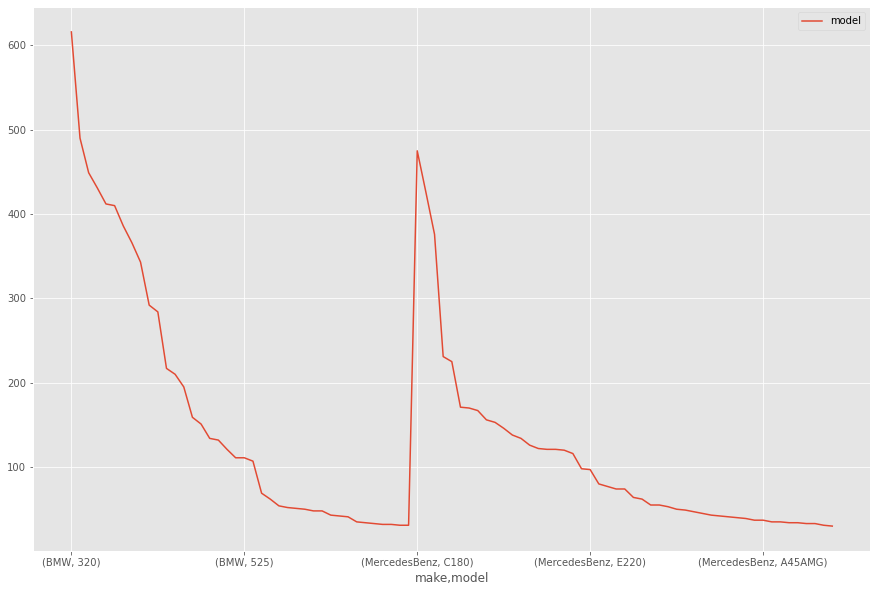

In [71]:
df_new.plot(kind= 'line', figsize=(15,10));

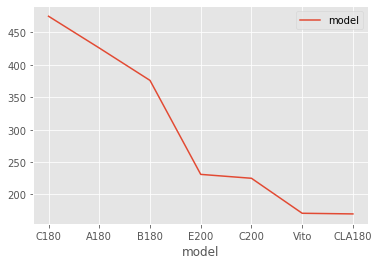

In [73]:
df_new.loc[('MercedesBenz')].head(7).plot();

In [106]:
dff = df.loc[:, ['make', 'model','year']].groupby('year').value_counts().sort_values(ascending= False).to_frame()
dff.head()

0
year make         model     
2016 BMW          330    172
2021 BMW          iX3    126
                  i3     120
                  iX     106
2016 MercedesBenz C350   105

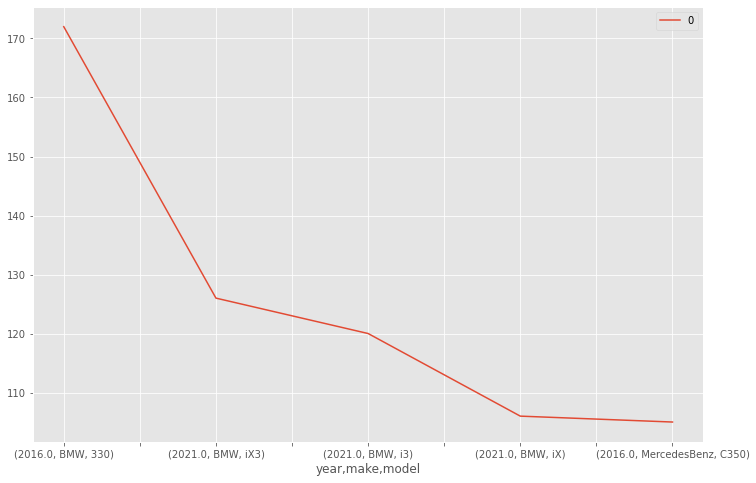

In [109]:
dff.head().plot(figsize=(12,8));

In [111]:
dff = df.loc[:, ['make', 'model','year', 'price']].groupby('price').value_counts().sort_values(ascending= False).to_frame()
dff.head()

,,,,0
price,make,model,year,
51482,BMW,i3,2021,10
78552,BMW,iX3,2021,9
37950,MercedesBenz,Vito,2019,8
22900,BMW,330,2016,8
64950,MercedesBenz,GLC300,2020,8


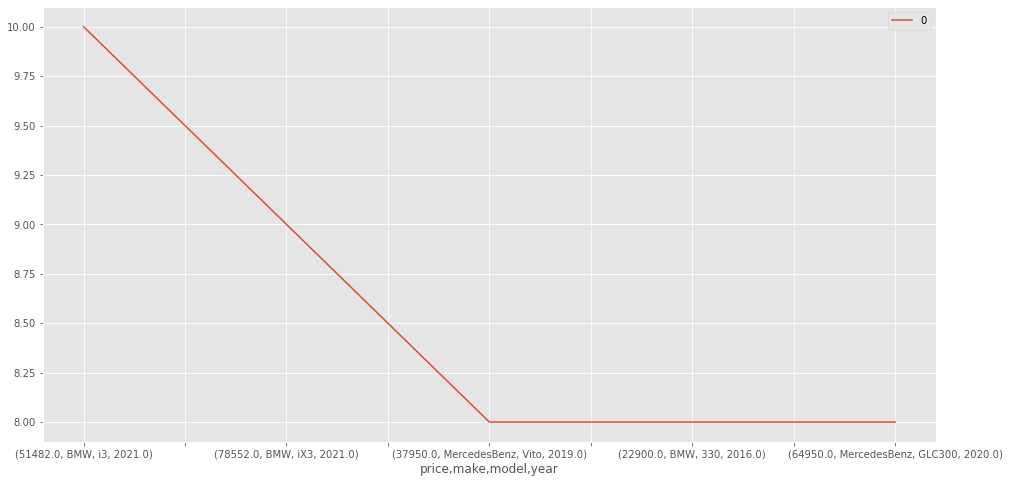

In [113]:
dff.head().plot(figsize=(16,8));

ValueError: setting an array element with a sequence.

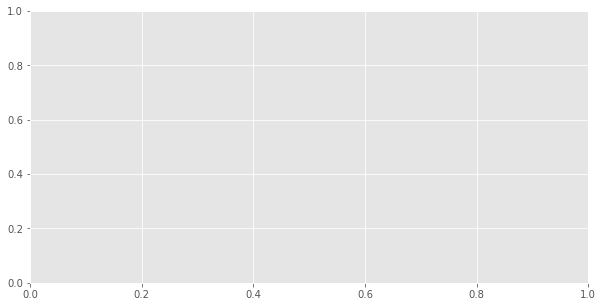

In [119]:
plt.figure('fig_size', (10,5))


plt.plot(dff.head().index, dff[0])
plt.title('Title')
plt.xlabel('X- Label')
plt.ylabel('Y-Label')

plt.legend()

plt.show()

In [120]:
dff.columns

RangeIndex(start=0, stop=1, step=1)

In [123]:
dff.index

MultiIndex([( 51482.0,          'BMW',       'i3', 2021.0),
            ( 78552.0,          'BMW',      'iX3', 2021.0),
            ( 37950.0, 'MercedesBenz',     'Vito', 2019.0),
            ( 22900.0,          'BMW',      '330', 2016.0),
            ( 64950.0, 'MercedesBenz',   'GLC300', 2020.0),
            ( 65390.0, 'MercedesBenz',     'C300', 2021.0),
            ( 13950.0,          'BMW',       'X1', 2011.0),
            ( 41950.0, 'MercedesBenz',     'A250', 2020.0),
            ( 69495.0,          'BMW',      'iX3', 2021.0),
            ( 24900.0, 'MercedesBenz',     'C350', 2016.0),
            ...
            ( 14940.0, 'MercedesBenz',     'B200', 2013.0),
            ( 14940.0, 'MercedesBenz',    'SL500', 2002.0),
            ( 14940.0, 'MercedesBenz', 'Sprinter', 2012.0),
            ( 14944.0, 'MercedesBenz',     'A180', 2014.0),
            ( 14944.0, 'MercedesBenz',     'E250', 2010.0),
            ( 14944.0, 'MercedesBenz',   'SLK200', 2008.0),
            ( 14944.0, '

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import regex
import datetime
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore')

# Show 2 decimals
pd.set_option('display.float_format', lambda x: '%.0f' % x)
#pd.options.display.float_format = '{:,.2f}'.format

#Butun kolon ve satirlari gormek icin
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Set plot background
sns.set_theme(style="whitegrid")

In [18]:
import re
import pandas as pd

In [87]:
df = pd.DataFrame({'gearbox' : ['\n,Automatic,\n', '\n,Semi-automatic,\n', '\n,Manual,\n', '\n,Automatic,\n', '', '', '', '', ''],
             'make' : ['bmw', 'bmw', 'mer', 'mer', 'audi', 'audi', 'audi', 'audi', 'audi'],
        'fuel_con' : ["\n,None,\n", "['\\n', ['4.9 l/100 km (comb.)', ' ', ' '], '\\n']",
       "['\\n', ['5 l/100 km (comb.)', ' ', ' '], '\\n']",
       "['\\n', ['0 l/100 km (comb.)', '0 l/100 km (city)', '0 l/100 km (country)'], '\\n']",
       "['\\n', ['5.3 l/100 km (comb.)', '6.5 l/100 km (city)', '4.6 l/100 km (country)'], '\\n']",
       "['\\n', ['5.9 l/100 km (comb.)', '7.5 l/100 km (city)', '5.1 l/100 km (country)'], '\\n']",
       "['\\n', ['7.5 l/100 km (comb.)', '9.4 l/100 km (city)', '6.4 l/100 km (country)'], '\\n']",
       "['\\n', ['3.2 l/100 km (comb.)', '4.1 l/100 km (city)', '2.7 l/100 km (country)'], '\\n']",
       "['\\n', ['5 l/100 km (comb.)', '6.1 l/100 km (city)', '4.3 l/100 km (country)'], '\\n']"] })
df

,gearbox,make,fuel_con
0,"\n,Automatic,\n",bmw,"\n,None,\n"
1,"\n,Semi-automatic,\n",bmw,"['\n', ['4.9 l/100 km (comb.)', ' ', ' '], '\n']"
2,"\n,Manual,\n",mer,"['\n', ['5 l/100 km (comb.)', ' ', ' '], '\n']"
3,"\n,Automatic,\n",mer,"['\n', ['0 l/100 km (comb.)', '0 l/100 km (cit..."
4,,audi,"['\n', ['5.3 l/100 km (comb.)', '6.5 l/100 km ..."
5,,audi,"['\n', ['5.9 l/100 km (comb.)', '7.5 l/100 km ..."
6,,audi,"['\n', ['7.5 l/100 km (comb.)', '9.4 l/100 km ..."
7,,audi,"['\n', ['3.2 l/100 km (comb.)', '4.1 l/100 km ..."
8,,audi,"['\n', ['5 l/100 km (comb.)', '6.1 l/100 km (c..."


In [88]:
df.fuel = df.fuel_con.str.replace(r"[,'\\[\]]" , '').str.replace('l/100 km', '').str.removeprefix('n').str.removesuffix('n')
df.fuel

0                                     \nNone\n
1                            4.9  (comb.)     
2                              5  (comb.)     
3           0  (comb.) 0  (city) 0  (country) 
4     5.3  (comb.) 6.5  (city) 4.6  (country) 
5     5.9  (comb.) 7.5  (city) 5.1  (country) 
6     7.5  (comb.) 9.4  (city) 6.4  (country) 
7     3.2  (comb.) 4.1  (city) 2.7  (country) 
8       5  (comb.) 6.1  (city) 4.3  (country) 
Name: fuel_con, dtype: object

In [91]:
df.fuel.str.split(')', expand= True, n=2)

,0,1,2
0,\nNone\n,None,None
1,4.9 (comb.,,None
2,5 (comb.,,None
3,0 (comb.,0 (city,0 (country)
4,5.3 (comb.,6.5 (city,4.6 (country)
5,5.9 (comb.,7.5 (city,5.1 (country)
6,7.5 (comb.,9.4 (city,6.4 (country)
7,3.2 (comb.,4.1 (city,2.7 (country)
8,5 (comb.,6.1 (city,4.3 (country)


In [59]:
df.gearbox.str.removeprefix('\n,').str.removesuffix(',\n')

0         Automatic
1    Semi-automatic
2            Manual
3         Automatic
Name: gearbox, dtype: object

In [60]:
df.gearbox

0         \n,Automatic,\n
1    \n,Semi-automatic,\n
2            \n,Manual,\n
3         \n,Automatic,\n
Name: gearbox, dtype: object

In [30]:
s = 'foobarqux'
re.search('ba[arqux]' , s)

<re.Match object; span=(3, 6), match='bar'>

In [56]:
s = '\n,Automatic,\n'
s.removeprefix('\n,').removesuffix(',\n')

'Automatic'

In [40]:
re.search('\s', 'foo\nbar baz')

<re.Match object; span=(3, 4), match='\n'>

In [52]:
re.search('\s.', 'foo\nbar baz')

<re.Match object; span=(3, 5), match='\nb'>

In [48]:
re.search('\s', '\nf12\nbar baz\n')

<re.Match object; span=(0, 1), match='\n'>

In [51]:
re.search('\s', '  \n foo  \n  ')

<re.Match object; span=(0, 1), match=' '>

In [53]:
s = r'foo\bar'
re.search('\\\\', s)

<re.Match object; span=(3, 4), match='\\'>

In [49]:
df = pd.DataFrame({'col1' : ['$162500.00', '$16.00', '$99.00'],
                  'col2' : ['$100', '$99.0', '$999.00']})
df

,col1,col2
0,$162500.00,$100
1,$16.00,$99.0
2,$99.00,$999.00


In [53]:
def clean(val):
    new_val  = val.replace(',','').replace('$', '')
    return float(new_val)

print(df.col1.apply(clean))
print(df.col2.apply(clean))

0    162500.0
1        16.0
2        99.0
Name: col1, dtype: float64
0    100.0
1     99.0
2    999.0
Name: col2, dtype: float64


In [56]:
def rem_pre(val):
    new_val  = val.removeprefix('$')
    return float(new_val)

df['col1'].apply(rem_pre).apply()

0    162500.0
1        16.0
2        99.0
Name: col1, dtype: float64